In [1]:
import pandas as pd

snps_all=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/hepg2.sign.id.LP190708.txt.gz", sep="\t", header=0)

preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/preds_fold0_hepg2_sig/snp_scores.tsv", sep="\t", header=0)

In [3]:
preds.head()
preds[snps_all.columns] = preds["META_DATA"].str.split(",", expand=True)
preds["POS1"] = preds["POS0"] + 1


sig_cols = preds.columns.tolist()

preds[sig_cols[0:2]+[sig_cols[-1]]+sig_cols[2:-1]].to_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/preds_fold0_hepg2_sig/snp_scores_bed_format.bed", sep="\t", header=False, index=False)

In [4]:
import matplotlib.pyplot as plt

In [6]:
preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/preds_fold0_hepg2_sig/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)



In [7]:
preds.columns = sig_cols[0:2]+[sig_cols[-1]]+sig_cols[2:-1]

In [8]:
preds.head()

,CHR,POS0,POS1,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff,chr,SNP_ID,SNPabspos,ref.element.count,alt.element.count,hepg2.ref.mean,hepg2.alt.mean,hepg2.wilcox.p.value,hepg2.wilcox.p.value.random,ref,alt
0,chr10,101093161,101093162,C,T,"chr10,rs11190058,101093162,226,117,4.629646879...",-0.039395,-41.353477,-0.021602,chr10,rs11190058,101093162,226,117,4.629647,0.787731,8.508169e-04,0.310018,C,T
1,chr10,102120533,102120534,C,T,"chr10,rs61732512,102120534,378,38,10.808207143...",-0.019208,-14.768434,-0.008199,chr10,rs61732512,102120534,378,38,10.808207,3.306092,9.870135e-04,0.963738,C,T
2,chr10,18620949,18620950,G,A,"chr10,rs9645525,18620950,87,268,1.666940970549...",-0.010940,-21.038605,-0.010441,chr10,rs9645525,18620950,87,268,1.666941,5.493459,4.738338e-05,0.723860,G,A
3,chr10,67884566,67884567,A,G,"chr10,rs1960622,67884567,51,309,0.576512391993...",0.025003,24.381012,0.012914,chr10,rs1960622,67884567,51,309,0.576512,6.081183,3.657079e-06,0.249040,A,G
4,chr10,71392494,71392495,T,A,"chr10,rs2616089,71392495,129,102,6.52026656330...",-0.176760,-48.019270,-0.022547,chr10,rs2616089,71392495,129,102,6.520267,0.181656,2.606949e-10,0.754321,T,A


In [9]:
preds.shape

(355, 20)

Text(0.5, 1.0, 'Pearsonr = 0.47')

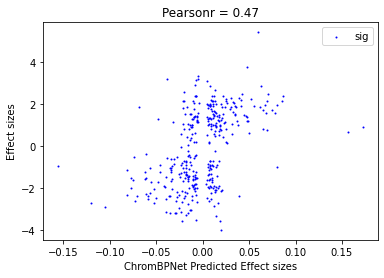

In [22]:
import numpy as np
from scipy.stats import pearsonr

preds["Z_score_fixed"] = np.log2((preds["hepg2.alt.mean"]+1)/(preds["hepg2.ref.mean"]+1))
#preds["Z_score_fixed"] = np.log2((preds["hepg2.alt.mean"]+1)/(preds["hepg2.ref.mean"]+1)/ (preds["alt.element.count"])/(preds["alt.element.count"]+1))

plt.scatter(preds["probs_jsd_diff"], preds["Z_score_fixed"].astype(float), s=1, c="b", label="sig")


plt.xlabel("ChromBPNet Predicted Effect sizes")
plt.ylabel("Effect sizes")
plt.legend()
plt.title("Pearsonr = "+str(np.round(pearsonr(preds["probs_jsd_diff"], preds["Z_score_fixed"].astype(float))[0],2)))

